In [1]:
!pip install opencv-python
!pip install imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import os

In [32]:
def rotate_bound(image, angle, center):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cY, cX) = center
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

def rotate_crop(image_path):
    img = cv2.imread(image_path)
    img_bin = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) > 0).astype(np.uint8)
    img_bin = cv2.medianBlur(img_bin,5)
    points = np.array(np.nonzero(img_bin)).T
    center, (h,w), angle = cv2.minAreaRect(points)
    img = rotate_bound(img,-angle,center=center)
    # img_bin = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) > 0).astype(np.uint8)
    # img_bin = cv2.medianBlur(img_bin,5)
    # points = np.array(np.nonzero(img_bin)).T
    # center, (h,w), angle = cv2.minAreaRect(points)
    # img = img[int(center[0]-h/2):int(center[0]+h/2),int(center[1]-w/2):int(center[1]+w/2)]
    return img

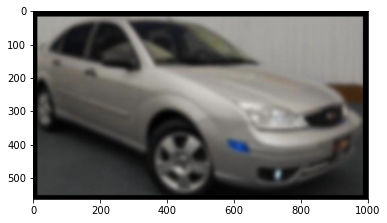

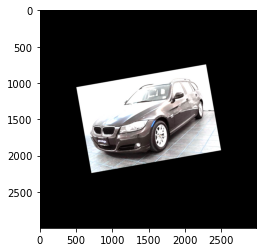

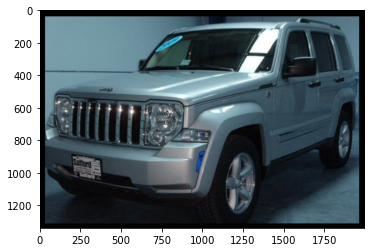

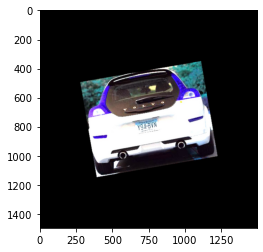

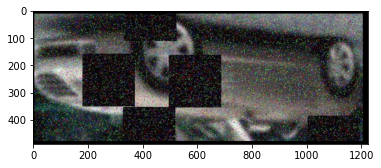

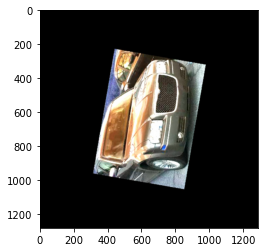

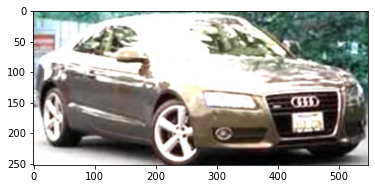

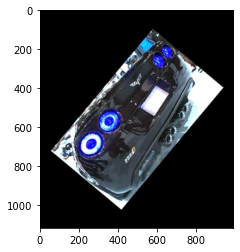

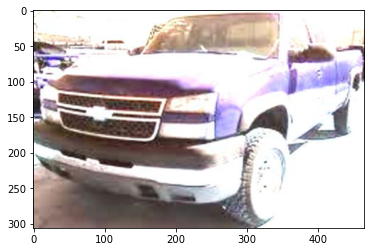

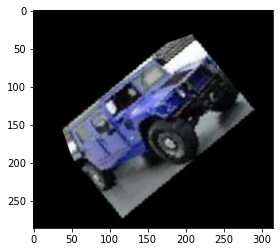

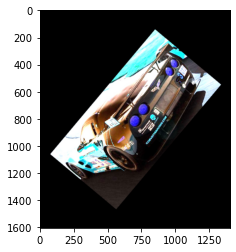

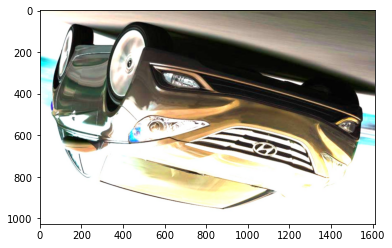

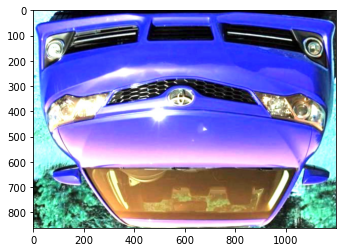

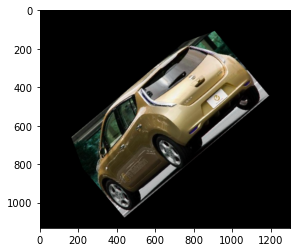

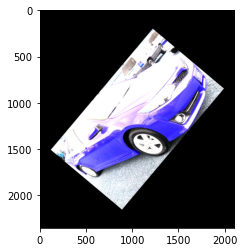

KeyboardInterrupt: 

In [33]:
for root, dirs, files in os.walk("../datasets/datasets_train/car_models_database_train", topdown=False):
    for name in files:
        if 'checkpoint' not in name:
            img = rotate_crop(os.path.join(root, name))
            plt.imshow(img)
            plt.show()